In [1]:
import cv2
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


In [2]:
for root,dirs,files in os.walk("./screenshot"):
    # print(root)
    img_head = None
    img_seq = []
    for file in files:
        # print(file)
        img = cv2.imread(os.path.join(root,file))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = np.array(img, dtype=np.float32)
        img_seq.append(img)
        if img_head is None:
            img_head = img
img_head_gray = cv2.cvtColor(img_head,cv2.COLOR_RGB2GRAY).astype('uint8')

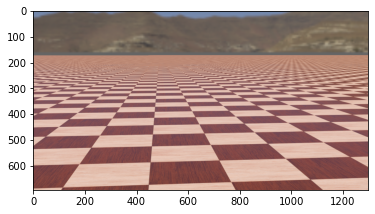

In [3]:
plt.imshow(img_head.astype('uint8'))
plt.show()

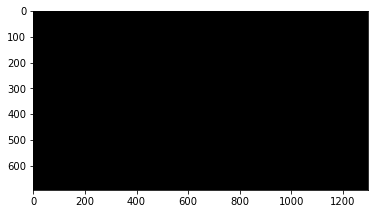

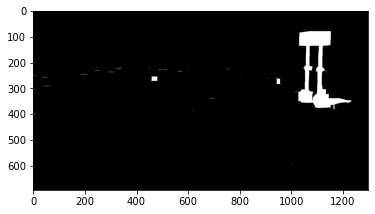

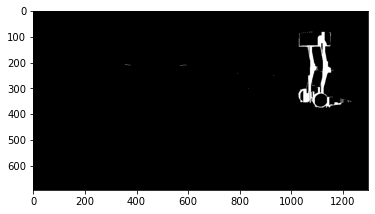

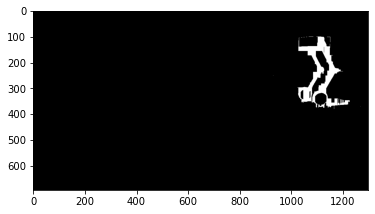

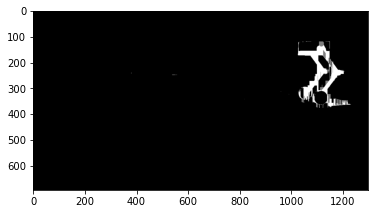

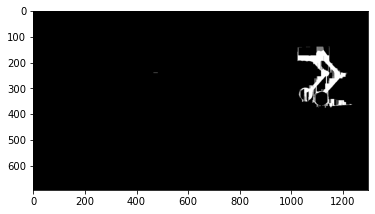

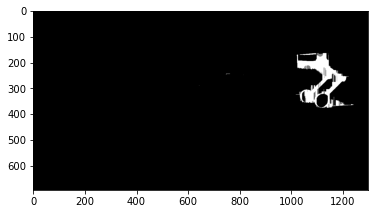

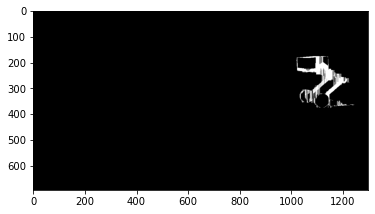

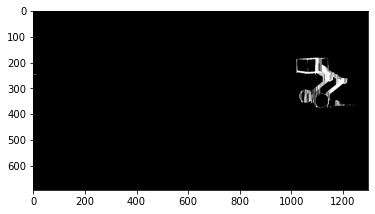

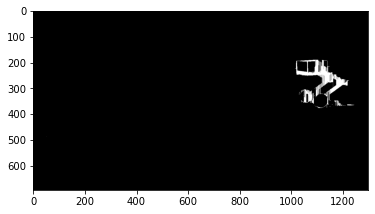

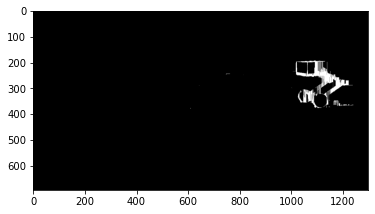

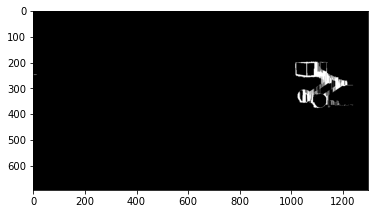

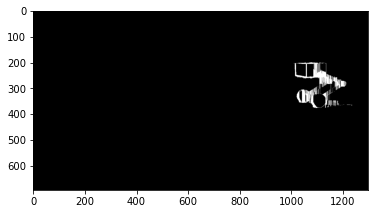

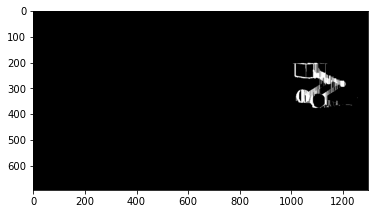

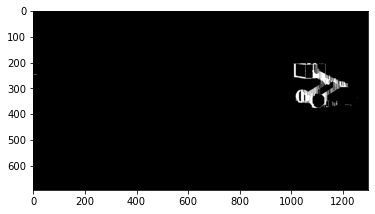

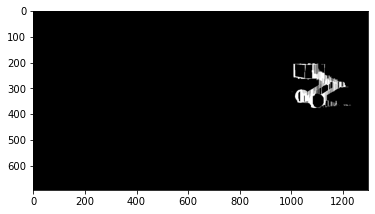

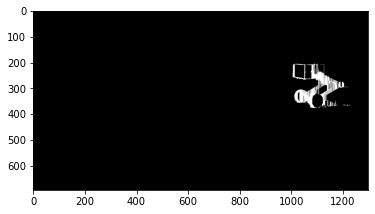

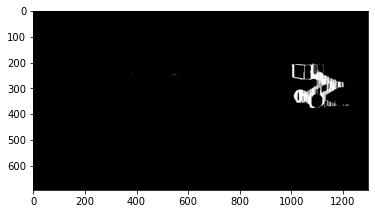

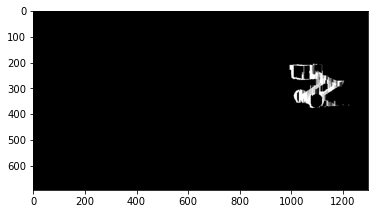

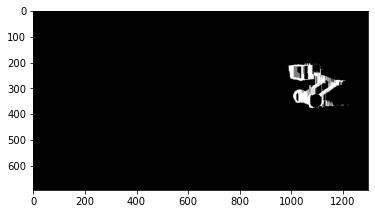

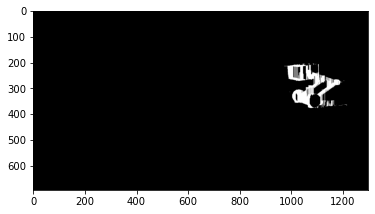

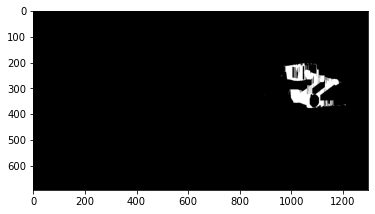

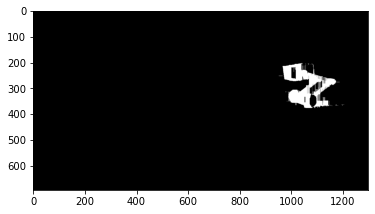

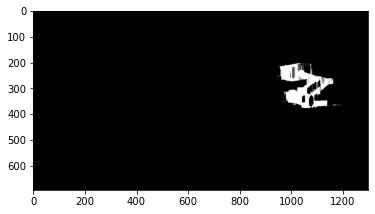

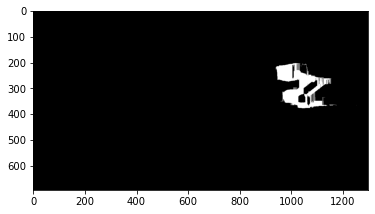

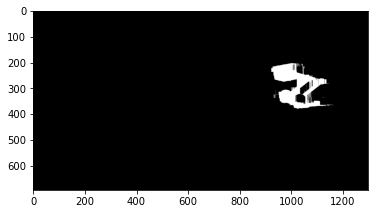

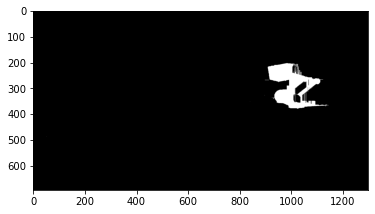

KeyboardInterrupt: 

In [20]:
backSub = cv2.createBackgroundSubtractorMOG2()
backSub.apply(img_head)
kernel = cv2.getGaussianKernel(3,3)
for img in img_seq:
    fgMask = backSub.apply(img)
    fgMask = cv2.morphologyEx(fgMask,cv2.MORPH_CLOSE,kernel,iterations=10)
    plt.imshow(fgMask,cmap='gray')
    plt.show()

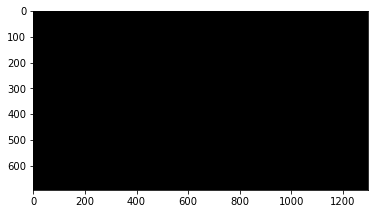

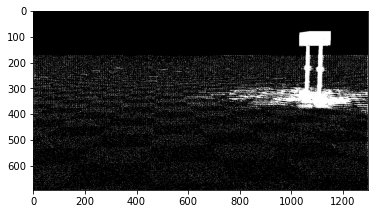

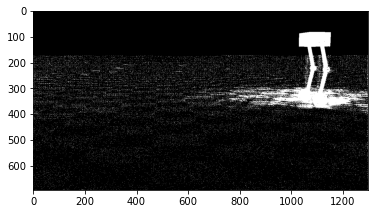

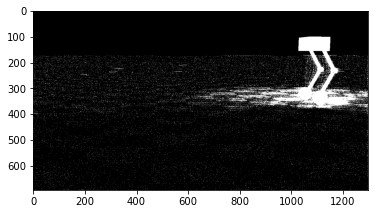

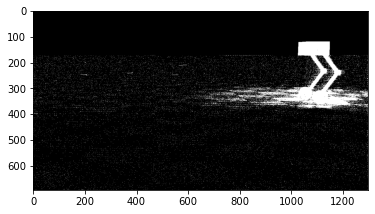

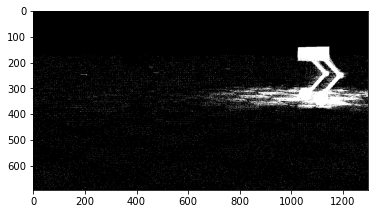

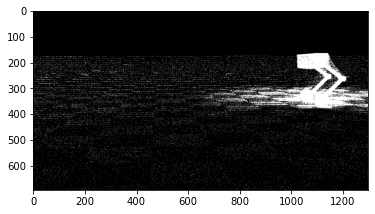

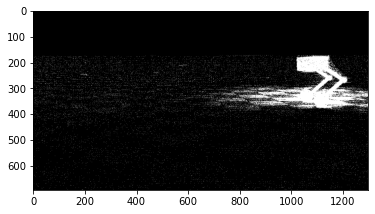

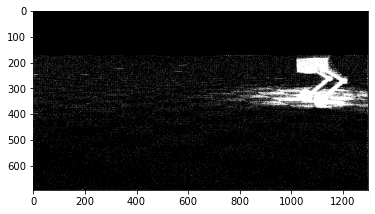

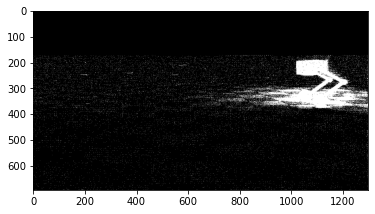

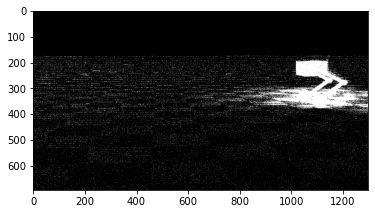

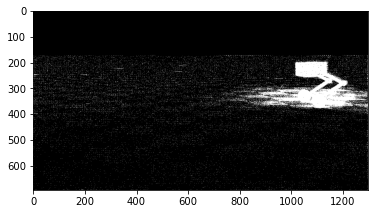

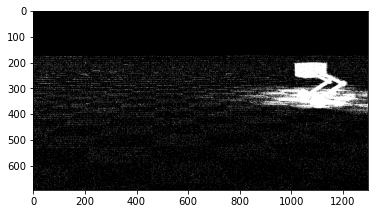

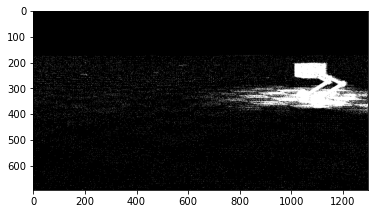

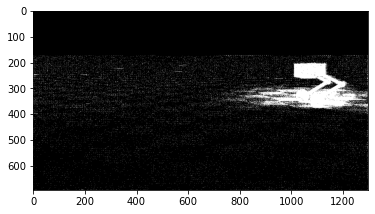

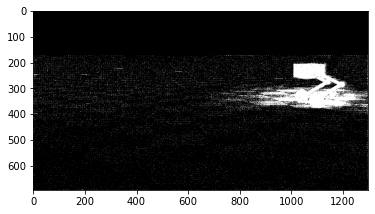

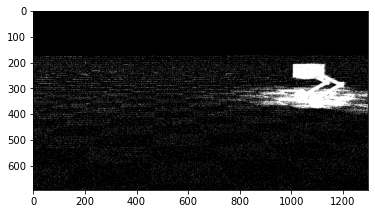

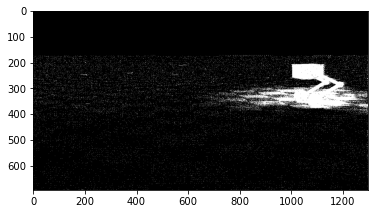

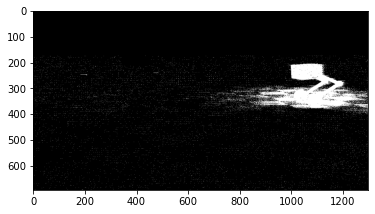

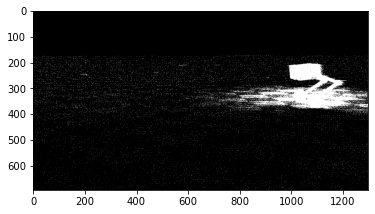

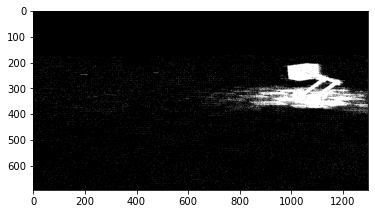

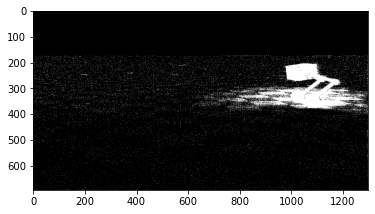

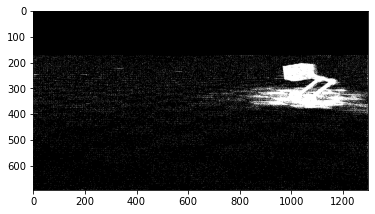

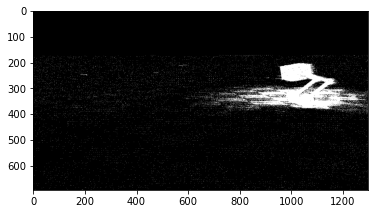

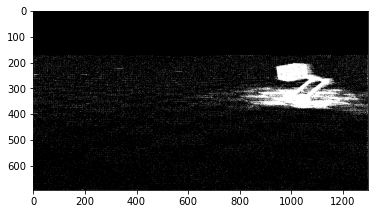

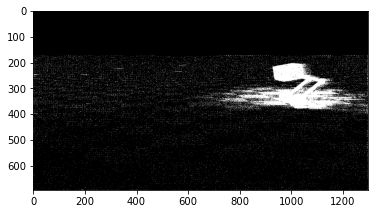

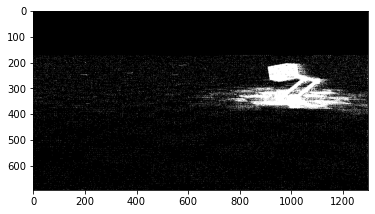

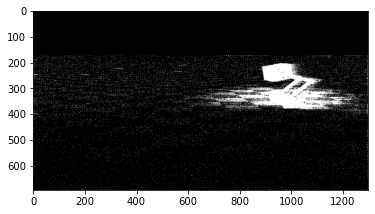

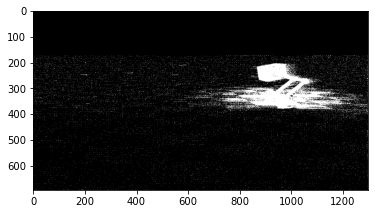

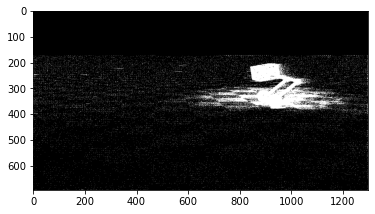

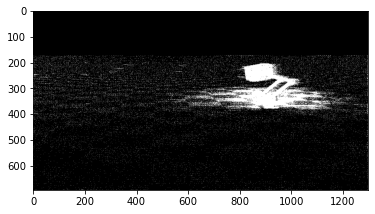

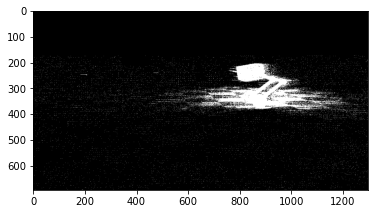

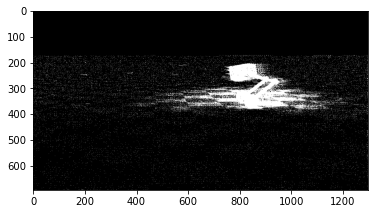

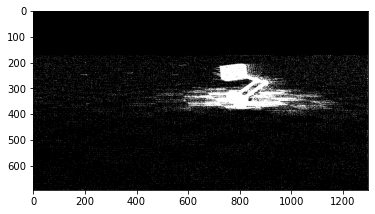

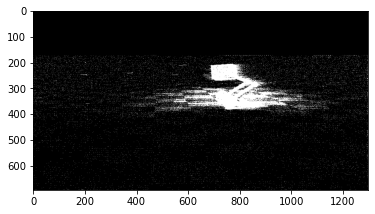

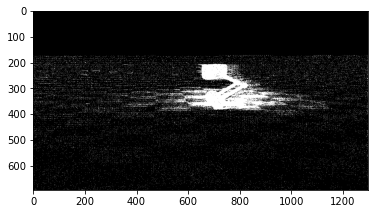

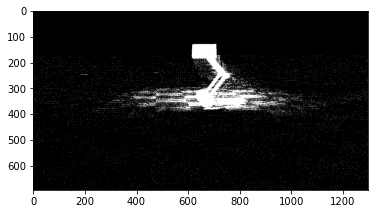

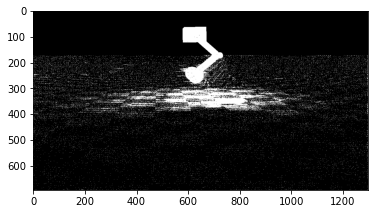

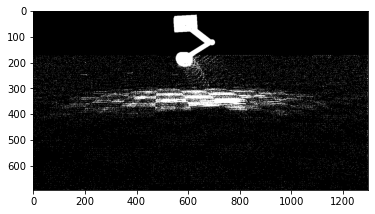

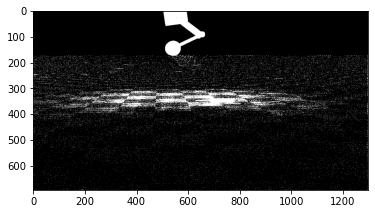

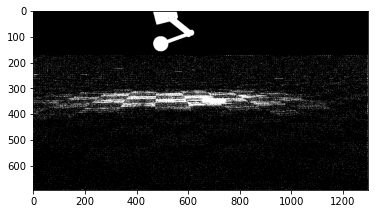

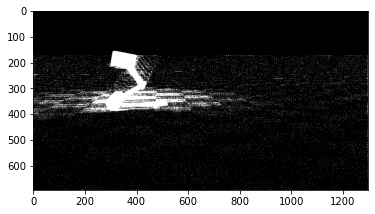

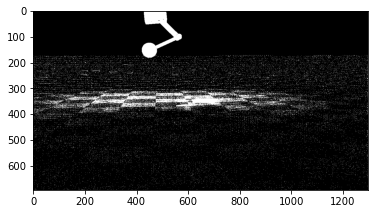

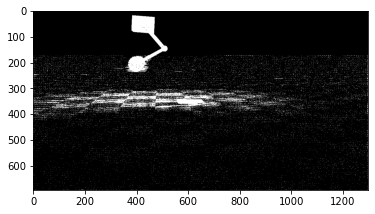

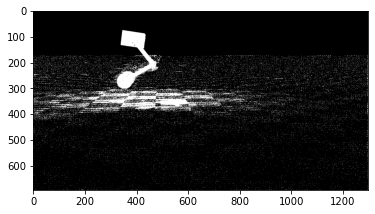

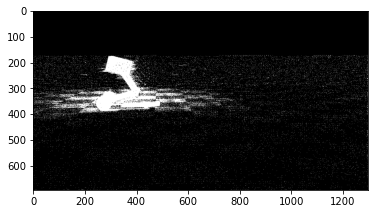

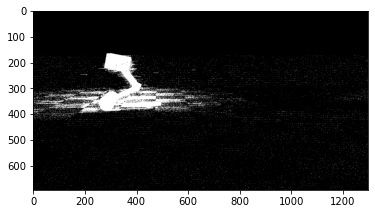

KeyboardInterrupt: 

In [9]:
img_robot = []

for img in img_seq:
    img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY).astype('uint8')
    # img_sub = cv2.bitwise_or(img_head_gray,img_gray)
    img_sub = img_gray-img_head_gray
    _,img_thr = cv2.threshold(img_sub,0,255,cv2.THRESH_BINARY)
    plt.imshow(img_thr,cmap='gray')
    plt.show()

In [81]:
print(img_thr)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


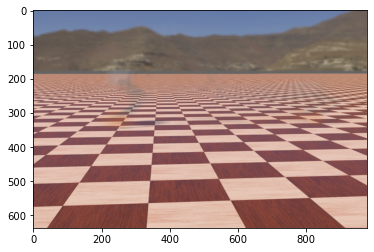

In [35]:
length = len(img_seq)
span = np.arange(length)
norm = np.linalg.norm(span,ord=1)
seqs = span/norm
alpha = 0.8
# img_composite = img_head
img_composite = np.zeros_like(img_seq[0])
for seq,img in zip(seqs,img_seq):
    img_composite += img*seq

img_composite_8u = img_composite.astype(np.uint8)
plt.imshow(img_composite_8u)
plt.show()

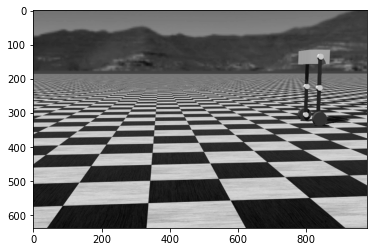

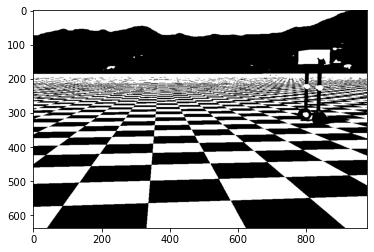

130.0


In [55]:
img_test = np.array(cv2.cvtColor(img_seq[0],cv2.COLOR_BGR2GRAY),dtype=np.uint8)
thr,img_thr = cv2.threshold(img_test,0,255,cv2.THRESH_OTSU)
plt.imshow(img_test,cmap='gray')
plt.show()
plt.imshow(img_thr,cmap='gray')
plt.show()
print(thr)